In [1]:
import os

In [2]:
os.listdir('/home/suraj/Learning/Dataset/flowers')

['tulip', 'rose', 'dandelion', 'daisy', 'sunflower']

In [3]:
DATA_DIR = '/home/suraj/Learning/Dataset/flowers'

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
###PREPROCESSING

In [5]:
image_size = (128, 128)
batch_size = 32

In [6]:
import tensorflow as tf
import numpy
import cv2
import os
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2022-02-09 16:12:03.870799: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/suraj/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-02-09 16:12:03.870911: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
#DATA VISUALIZATION PROCESS

In [7]:
classes = os.listdir(DATA_DIR)

In [8]:
print(classes)

['tulip', 'rose', 'dandelion', 'daisy', 'sunflower']


In [12]:
#YOU CAN SEE THE DATA ABOVE IS NOT NORMALIZED i.e. it ranges from 0 to 255
#NOW LET'S NORMALIZE THE DATASET
#for normalizing the dataset you can also add rescaling layer in model architecture

In [13]:
#DATA DIVISION IN TRAINING AND TESTING

In [9]:
train_ds = image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.1,
    subset="training",
    seed=1337,        
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical", #for multiple object classification
    class_names=classes #above classes
)

val_ds = image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.1,
    subset="validation",
    seed=1337,        
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
    class_names=classes    
)

Found 4317 files belonging to 5 classes.
Using 3886 files for training.


2022-02-09 16:12:27.079912: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-02-09 16:12:27.079939: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (suraj): /proc/driver/nvidia/version does not exist
2022-02-09 16:12:27.082007: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 4317 files belonging to 5 classes.
Using 431 files for validation.


In [10]:
for batches, labels in train_ds:
    for images in batches:
        plt.imshow(images)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Error in callback <function flush_figures at 0x7f1cc9ee3700> (for post_execute):


KeyboardInterrupt: 

In [13]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Rescaling
from tensorflow.keras.models import Sequential 

In [14]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
import time
MODEL_NAME = 'flowers_recogn_32_{}'.format(int(time.time()))

In [15]:
CHECKPOINT_DIR_PATH = "/home/suraj/Learning/tensorflow/flowers/training-1/cp.ckpt"
checkpoint_dir = os.path.dirname(CHECKPOINT_DIR_PATH)

tensorboard = TensorBoard(log_dir="logs/{}".format(MODEL_NAME))
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=CHECKPOINT_DIR_PATH,
                                                 save_weights_only=True,
                                                 verbose=1)

In [22]:
model = Sequential()

model.add(Rescaling(1./255))
model.add(Conv2D(64, (4,4), strides=(2,2), padding="same", activation="relu", input_shape=(128,128,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (4,4), strides=(2,2), padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(5, activation="softmax"))

In [23]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
history = model.fit(train_ds, epochs=5, batch_size=32, validation_data=val_ds, callbacks=[tensorboard, cp_callback])

Epoch 1/5
122/122 [==============================] - ETA: 0s - loss: 1.3975 - accuracy: 0.3976
Epoch 1: saving model to /home/suraj/Learning/tensorflow/flowers/training-1/cp.ckpt
122/122 [==============================] - 18s 142ms/step - loss: 1.3975 - accuracy: 0.3976 - val_loss: 1.2909 - val_accuracy: 0.4919
Epoch 2/5
122/122 [==============================] - ETA: 0s - loss: 1.1764 - accuracy: 0.4956
Epoch 2: saving model to /home/suraj/Learning/tensorflow/flowers/training-1/cp.ckpt
122/122 [==============================] - 17s 140ms/step - loss: 1.1764 - accuracy: 0.4956 - val_loss: 1.1617 - val_accuracy: 0.5058
Epoch 3/5
122/122 [==============================] - ETA: 0s - loss: 1.0908 - accuracy: 0.5363
Epoch 3: saving model to /home/suraj/Learning/tensorflow/flowers/training-1/cp.ckpt
122/122 [==============================] - 17s 135ms/step - loss: 1.0908 - accuracy: 0.5363 - val_loss: 1.2075 - val_accuracy: 0.5336
Epoch 4/5
122/122 [==============================] - ETA: 0s 

In [26]:
model.save('my_model.h5')

Text(0.5, 0, 'validation_loss')

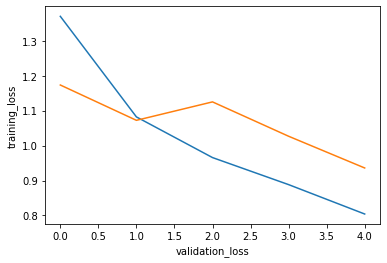

In [39]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("training_loss")
plt.xlabel("validation_loss")

Text(0.5, 0, 'validation_accuracy')

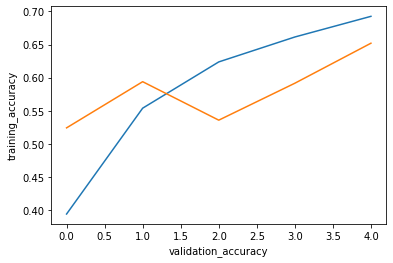

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel("training_accuracy")
plt.xlabel("validation_accuracy")

In [25]:
predictions = model.predict(val_ds)

In [24]:
flowerMap = {
    0: 'tulip',
    1: 'rose',
    2: 'dandelion',
    3: 'daisy',
    4: 'sunflower'
}

def predict_custom_image(path):
    img_array = cv2.imread(path)
    resized_array = cv2.resize(img_array, (128, 128))
    resized_array = resized_array.reshape(-1, 128, 128, 3)
    return flowerMap[np.argmax(model.predict([resized_array]))]
    

In [26]:
print(predict_custom_image('/home/suraj/Learning/tensorflow/flowers/test/rose2.jpg'))

dandelion


In [16]:
new_model = Sequential()

new_model.add(Rescaling(1./255))
new_model.add(Conv2D(64, (4,4), strides=(2,2), padding="same", activation="relu", input_shape=(128,128,3)))
new_model.add(MaxPooling2D())
new_model.add(Conv2D(64, (4,4), strides=(2,2), padding="same", activation="relu"))
new_model.add(MaxPooling2D())
new_model.add(Flatten())
new_model.add(Dense(32, activation="relu"))
new_model.add(Dense(5, activation="softmax"))

new_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [17]:
#remember this is used for testing

In [20]:
loss, accuracy = new_model.evaluate(val_ds)
print(loss)

14/14 [==============================] - 1s 37ms/step - loss: 1.6119 - accuracy: 0.1810
1.6118628978729248


In [21]:
# go to this https://www.tensorflow.org/tutorials/keras/save_and_load if any confusion
new_model.load_weights(CHECKPOINT_DIR_PATH)

# using pretrained weights
new_model.evaluate(val_ds)


14/14 [==============================] - 1s 37ms/step - loss: 0.9360 - accuracy: 0.6520


[0.9360026121139526, 0.6519721746444702]

In [46]:
new_model.fit(train_ds, epochs=2, batch_size=32, validation_data=val_ds)

Epoch 1/2
 27/122 [=====>........................] - ETA: 13s - loss: 1.5147 - accuracy: 0.3032

KeyboardInterrupt: 